# Linear Regression Simple Example

## libraries


In [161]:
import pandas as pd
import numpy as np
import scipy 

from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

## data insight
MEDV - Median value of owner-occupied homes in $1000's

RM - average number of rooms per dwelling

In [162]:
# load dataset
dataset = load_boston()
boston_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# add target value to the dataset
boston_df['MEDV'] = dataset.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [163]:
df = boston_df[["RM", "MEDV"]]
df.columns = ["no_rooms", "price"]

In [164]:
df.head()

,no_rooms,price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


## relationship between variables

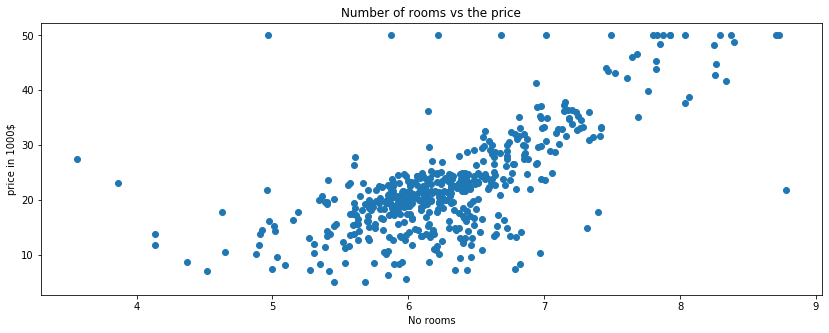

In [165]:
plt.figure(figsize=(14, 5))

plt.scatter(df["no_rooms"], df['price'])
plt.title("Number of rooms vs the price")
plt.xlabel("No rooms")
plt.ylabel('price in 1000$')
plt.show()

## math and stats

correlation coefficient (r)

r > 0 indicates a positive linear relationship

r < 0 indicates a negative linear relationship

r = 0 indicates, there is no linear relationship 

In [166]:
scipy.stats.pearsonr(df["no_rooms"], df['price'])[0]

0.6953599470715393

## linear regression model

In [167]:
cls = LinearRegression()

In [168]:
X = df["no_rooms"].values.reshape(-1,1)
y = df["price"].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

cls.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## prediction

In [169]:
prediction = cls.predict(X_test)

## plot results

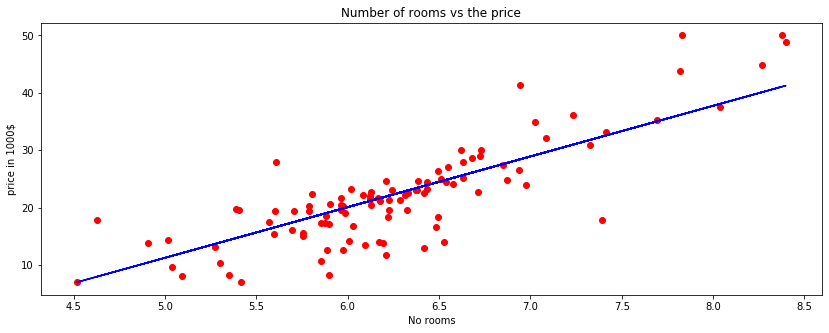

In [170]:
plt.figure(figsize=(14, 5))

plt.scatter(X_test, Y_test, color = "red")
plt.plot(X_test, prediction, color = "blue")
plt.title("Number of rooms vs the price")
plt.xlabel("No rooms")
plt.ylabel('price in 1000$')
plt.show()

## error measurements
rmse - root mean square error

In [171]:
rmse = (np.sqrt(mean_squared_error(Y_test, prediction)))
print(rmse)

4.895963186952216
